In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gamma, poisson

In [4]:
def generuj_poissona_metoda_1(lambda_):
    n = 1
    a = 1
    while True:
        U = np.random.rand()
        a *= U
        if a < np.exp(-lambda_):
            return n - 1
        n += 1

In [5]:
def generuj_poissona_metoda_2(lambda_):
    if lambda_ < 30:
        # Metoda oparta na generowaniu czasów oczekiwania na skok
        n = 1
        a = 1
        while True:
            U = np.random.rand()
            a *= U
            if a < np.exp(-lambda_):
                return n - 1
            n += 1
    else:
        # Metoda oparta na rozkładzie dwumianowym
        m = int(np.floor((7 / 8) * lambda_))
        Y = np.random.gamma(m, scale=1)
        if Y <= lambda_:
            Z = generuj_poissona_metoda_2(lambda_ - Y)
            return m + Z
        else:
            return np.random.binomial(m - 1, lambda_ / Y)

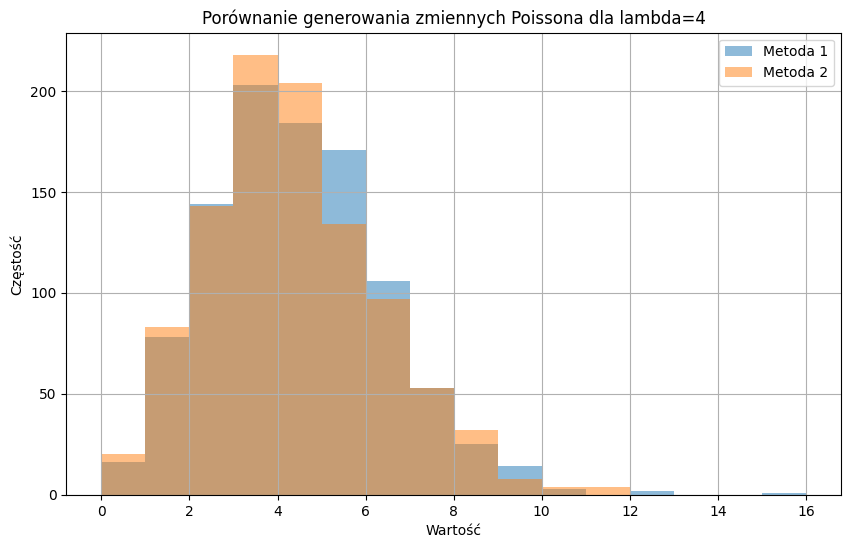

In [9]:
lambda_ = 4
num_samples = 1000

# Generowanie próbek za pomocą obu metod
samples_metoda_1 = [generuj_poissona_metoda_1(lambda_) for _ in range(num_samples)]
samples_metoda_2 = [generuj_poissona_metoda_2(lambda_) for _ in range(num_samples)]

# Wizualizacja wyników
plt.figure(figsize=(10, 6))

plt.hist(samples_metoda_1, bins=range(max(samples_metoda_1) + 1), alpha=0.5, label='Metoda 1')
plt.hist(samples_metoda_2, bins=range(max(samples_metoda_2) + 1), alpha=0.5, label='Metoda 2')

plt.xlabel('Wartość')
plt.ylabel('Częstość')
plt.title(f'Porównanie generowania zmiennych Poissona dla lambda={lambda_}')
plt.legend()
plt.grid(True)
plt.show()